## Contents
### Importing Libs
### Importing Dmataset
### Extreme values checks
### Data Prep for Regression Analysis
### Regression Analysis
### Regression Analysis After Excluding Outliers
### Regression Analysis Conclusion

## Importing Libs

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

## Importing Dataset

In [3]:
path = r'C:\Users\shyou\OneDrive\Documents\Data Analitics Course\Achievement6\Global SuperStore Project'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data' , 'GlobalSuperstore_clean.csv'))

In [5]:
df.head()

,Unnamed: 0.1,Unnamed: 0,id,order_id,order_date,ship_mode,customer_id,segment,city,state,...,category,Sub_category,sales,quantity,discount,profit,shipping_cost,year,month,sales_category
0,0,0,1,MX-2014-143658,2014-02-10,Standard Class,SC-20575,Consumer,Mexico City,Distrito Federal,...,Office Supplies,Labels,13.08,3,0.0,4.56,1.03,2014,2,Low
1,1,1,2,MX-2012-155047,2012-10-15,Standard Class,KW-16570,Consumer,Dos Quebradas,Risaralda,...,Furniture,Furnishings,252.16,8,0.0,90.72,13.45,2012,10,Low
2,2,2,3,MX-2012-155047,2012-10-15,Standard Class,KW-16570,Consumer,Dos Quebradas,Risaralda,...,Furniture,Bookcases,193.28,2,0.0,54.08,9.63,2012,10,Low
3,3,3,4,MX-2012-155047,2012-10-15,Standard Class,KW-16570,Consumer,Dos Quebradas,Risaralda,...,Office Supplies,Binders,35.44,4,0.0,4.96,1.37,2012,10,Low
4,4,4,5,MX-2012-155047,2012-10-15,Standard Class,KW-16570,Consumer,Dos Quebradas,Risaralda,...,Office Supplies,Art,71.60,2,0.0,11.44,3.79,2012,10,Low


In [6]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1'] , axis = 1, inplace = True)

## Extreme values checks

<AxesSubplot:xlabel='sales', ylabel='Count'>

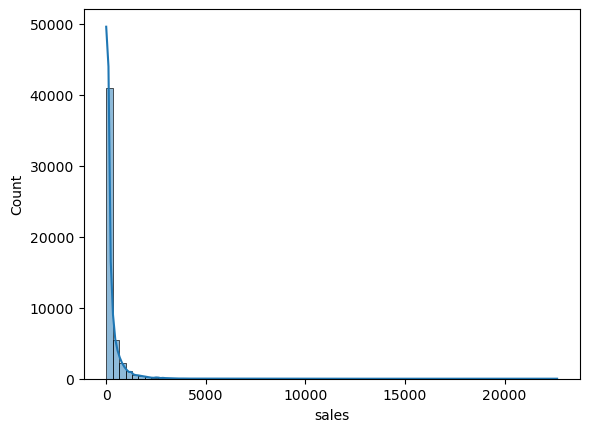

In [8]:
sns.histplot(df['sales'], bins=70, kde = True)

In [9]:
df['sales'].mean()

246.49058120258067

In [12]:
df['sales'].median()

85.053

In [13]:
df['sales'].max()

22638.48

## Data prep for regression analysis 

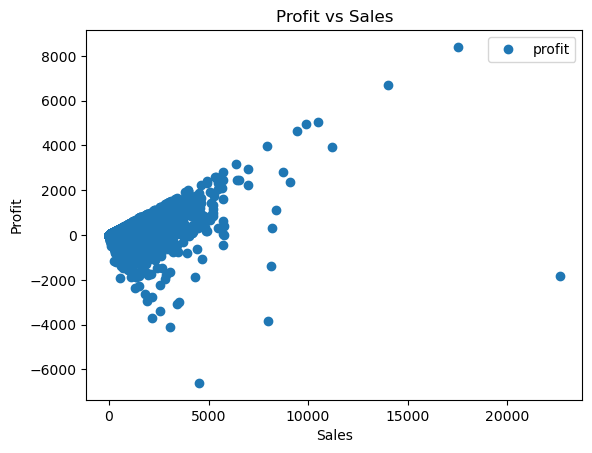

In [14]:
# Create a scatterplot 
df.plot(x = 'sales', y='profit',style='o') 
plt.title('Profit vs Sales')  
plt.xlabel('Sales')  
plt.ylabel('Profit')  
plt.show()

In [16]:
# Create X, y Numpy arrays
X = df['sales'].values.reshape(-1,1)
y = df['profit'].values.reshape(-1,1)

In [18]:
X 

array([[ 13.08],
       [252.16],
       [193.28],
       ...,
       [ 80.52],
       [130.44],
       [ 31.62]])

In [19]:
y

array([[ 4.56],
       [90.72],
       [54.08],
       ...,
       [20.88],
       [33.84],
       [12.96]])

In [20]:
# Create training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Regression Analysis

In [21]:
# Create Object
regression = LinearRegression()

In [22]:
regression.fit(X_train, y_train)

LinearRegression()

In [23]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

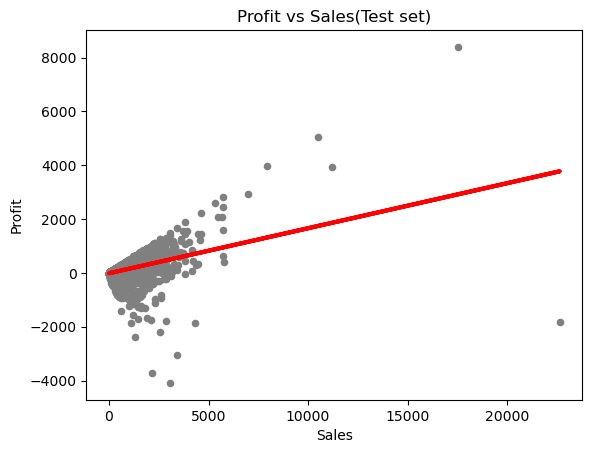

In [26]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 20)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Profit vs Sales(Test set)')
plot_test.xlabel('Sales')
plot_test.ylabel('Profit')
plot_test.show()

In [27]:
#Create summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [28]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.16747877]]
Mean squared error:  26323.110426881132
R2 score:  0.2573974344667528


In [29]:
y_predicted

array([[ 30.25520037],
       [338.06778591],
       [-10.25322529],
       ...,
       [  0.95713382],
       [ 28.26555255],
       [  4.06219026]])

In [30]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(20)

,Actual,Predicted
0,31.0800,30.255200
1,860.1600,338.067786
2,-8.3520,-10.253225
3,-0.0060,-10.824998
4,15.0300,-7.357182
5,5.4600,4.952507
6,-0.3000,-12.617691
7,9.6600,-6.392505
8,3.6288,-11.619852
9,1.1400,-10.135655


## Compare how the regression fits the training set

In [31]:
y_predicted_train = regression.predict(X_train)

In [32]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [33]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.16747877]]
Mean squared error:  21941.399600208297
R2 score:  0.22266051286591915


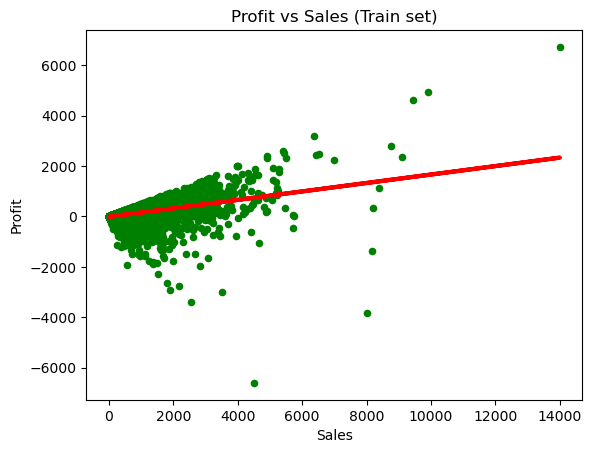

In [35]:
# Visualizing the training set results.

plot_test_2 = plt
plot_test_2.scatter(X_train, y_train, color='green', s = 20)
plot_test_2.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test_2.title('Profit vs Sales (Train set)')
plot_test_2.xlabel('Sales')
plot_test_2.ylabel('Profit')
plot_test_2.show()

## Performance improvement after removing outliers

In [36]:
df.describe()

,id,sales,quantity,discount,profit,shipping_cost,year,month
count,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,246.490581,3.476545,0.142908,28.610982,26.375915,2012.777208,7.143420
std,14806.29199,487.565361,2.278766,0.212280,174.340972,57.296804,1.098931,3.394749
min,1.00000,0.444000,1.000000,0.000000,-6599.978000,0.000000,2011.000000,1.000000
25%,12823.25000,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000,4.000000
50%,25645.50000,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000,7.000000
75%,38467.75000,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000,10.000000
max,51290.00000,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000,12.000000


In [38]:
df_2 = df[df['sales'] < 600]

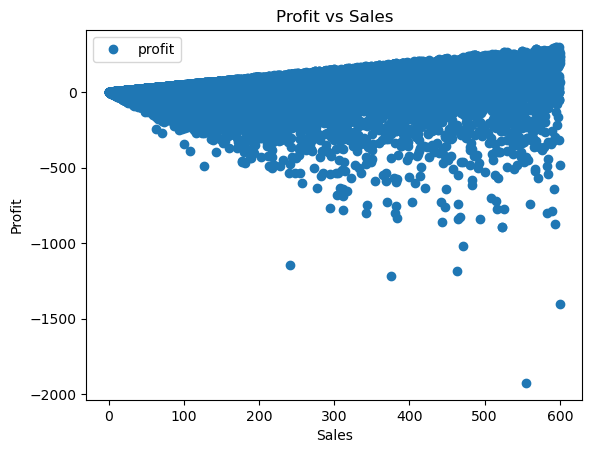

In [40]:
df_2.plot(x = 'sales', y='profit',style='o') 
plt.title('Profit vs Sales')  
plt.xlabel('Sales')  
plt.ylabel('Profit')  
plt.show()

In [41]:
X_2 = df_2['sales'].values.reshape(-1,1)
y_2 = df_2['profit'].values.reshape(-1,1)

In [42]:
X_2

array([[ 13.08],
       [252.16],
       [193.28],
       ...,
       [ 80.52],
       [130.44],
       [ 31.62]])

In [43]:
y_2

array([[ 4.56],
       [90.72],
       [54.08],
       ...,
       [20.88],
       [33.84],
       [12.96]])

In [44]:
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size = 0.3, random_state = 0)

In [45]:
regression_2 = LinearRegression()

In [46]:
regression_2.fit(X_2_train, y_2_train) 

LinearRegression()

In [47]:
y_2_predicted = regression.predict(X_2_test)

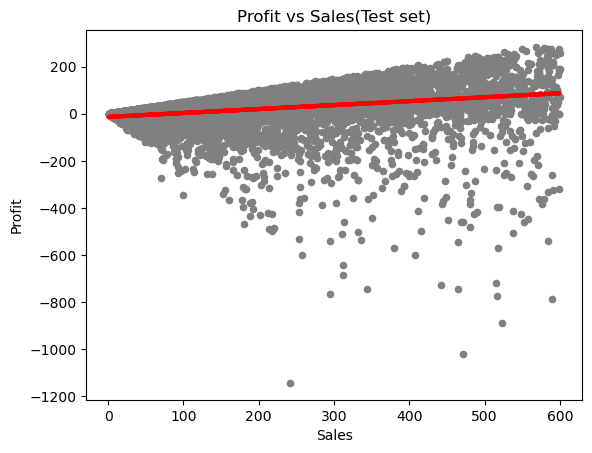

In [49]:
plot_test_3 = plt
plot_test_3.scatter(X_2_test, y_2_test, color='gray', s = 20)
plot_test_3.plot(X_2_test, y_2_predicted, color='red', linewidth =3)
plot_test_3.title('Profit vs Sales(Test set)')
plot_test_3.xlabel('Sales')
plot_test_3.ylabel('Profit')
plot_test_3.show()

In [50]:
rmse = mean_squared_error(y_2_test, y_2_predicted) 
r2 = r2_score(y_2_test, y_2_predicted)

In [51]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.16747877]]
Mean squared error:  4254.626895595757
R2 score:  0.0249758756693077


In [52]:
y_2_predicted

array([[ 43.43912934],
       [  7.90808906],
       [ -6.0006043 ],
       ...,
       [ -7.09591548],
       [-11.48218453],
       [ -6.70736472]])

In [53]:
data_2 = pd.DataFrame({'Actual': y_2_test.flatten(), 'Predicted': y_2_predicted.flatten()})
data_2.head(20)

,Actual,Predicted
0,94.8600,43.439129
1,-60.0825,7.908089
2,11.8584,-6.000604
3,14.5500,8.831316
4,20.8890,-4.823396
5,-34.2520,19.410615
6,-67.8510,51.578598
7,0.9900,-11.462087
8,5.9200,-10.803895
9,-11.3850,18.259533


## Regression Analysis Conclusion:
#### Independent variable:Sales , Dependent variable : Profit
#### Hypothesis: Higher sales result in higher profits and the highest profit margin belongs to sales between 5000 and 20000
#### I performed linear regression analysis on three sample data sets( training and test dataset without excluding outliers, and training dataset after excluding outlier points).
#### All three results show that: 
#### The slope ( coefficient regression) is 0.167 which means there is a so weak positive coefficient between to variables
#### A quite large rmse (Mean squared error), mse is an estimator that tells how close a regression line is to a set of points. ( and the large number means high distance)
#### A low R2 score ( less than 0.3) which explane the variance in the data
#### Based on above results and also comparing Actual and Predicted amounts of dependent variable (here profit), It can be concluded that linear regression is not suitable for analyzing the relationships and the effect of the independent variable on the dependent variable, It seems other variables should be investigated and other methods should be used.